#### Descubra quem fez o ENEM 2016 apenas para treino

Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

**Importações das bibliotecas**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

**Leitura da base de dados**

In [58]:
base_train = pd.read_csv('train.csv')
base_test = pd.read_csv('test.csv')

**Análise dos dados**

In [59]:
base_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [60]:
base_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [61]:
#Verificação de valores faltantes
base_test.isnull().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3144
TP_DEPENDENCIA_ADM_ESC    3144
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                1112
NU_NOTA_CH                1112
NU_NOTA_LC                1170
TP_LINGUA                    0
TP_STATUS_REDACAO         1170
NU_NOTA_COMP1             1170
NU_NOTA_COMP2             1170
NU_NOTA_COMP3             1170
NU_NOTA_

In [62]:
base_train.isnull().sum()

Unnamed: 0                     0
NU_INSCRICAO                   0
NU_ANO                         0
CO_MUNICIPIO_RESIDENCIA        0
NO_MUNICIPIO_RESIDENCIA        0
CO_UF_RESIDENCIA               0
SG_UF_RESIDENCIA               0
NU_IDADE                       0
TP_SEXO                        0
TP_ESTADO_CIVIL              528
TP_COR_RACA                    0
TP_NACIONALIDADE               0
CO_MUNICIPIO_NASCIMENTO      609
NO_MUNICIPIO_NASCIMENTO      609
CO_UF_NASCIMENTO             609
SG_UF_NASCIMENTO             609
TP_ST_CONCLUSAO                0
TP_ANO_CONCLUIU                0
TP_ESCOLA                      0
TP_ENSINO                   9448
IN_TREINEIRO                   0
CO_ESCOLA                   9448
CO_MUNICIPIO_ESC            9448
NO_MUNICIPIO_ESC            9448
CO_UF_ESC                   9448
SG_UF_ESC                   9448
TP_DEPENDENCIA_ADM_ESC      9448
TP_LOCALIZACAO_ESC          9448
TP_SIT_FUNC_ESC             9448
IN_BAIXA_VISAO                 0
          

**Tratando valores faltantes**

In [63]:
base_test.fillna(0,inplace=True)

base_train.fillna(0,inplace=True)

In [64]:
base_train.isnull().sum()

Unnamed: 0                 0
NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_NACIONALIDADE           0
CO_MUNICIPIO_NASCIMENTO    0
NO_MUNICIPIO_NASCIMENTO    0
CO_UF_NASCIMENTO           0
SG_UF_NASCIMENTO           0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
TP_ENSINO                  0
IN_TREINEIRO               0
CO_ESCOLA                  0
CO_MUNICIPIO_ESC           0
NO_MUNICIPIO_ESC           0
CO_UF_ESC                  0
SG_UF_ESC                  0
TP_DEPENDENCIA_ADM_ESC     0
TP_LOCALIZACAO_ESC         0
TP_SIT_FUNC_ESC            0
IN_BAIXA_VISAO             0
                          ..
Q021                       0
Q022                       0
Q023                       0
Q024          

**Divisão da base de dados**

In [65]:
X = base_train[['TP_ST_CONCLUSAO','NU_IDADE','TP_ANO_CONCLUIU']]
y = base_train['IN_TREINEIRO']

In [66]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
X_test = base_test[['TP_ST_CONCLUSAO','NU_IDADE','TP_ANO_CONCLUIU']]

In [68]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

/home/ana/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
y_pred = random_forest.predict(x_test)

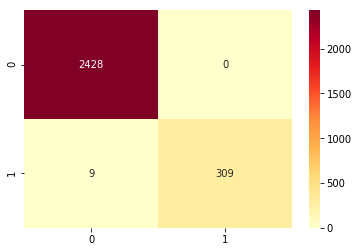

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap="YlOrRd" ,fmt='g')

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9967225054624909
Precision: 1.0
Recall: 0.9716981132075472


In [72]:
y_pred = random_forest.predict(X_test)

In [73]:
answer = pd.DataFrame(base_test, columns = ['NU_INSCRICAO'])
answer['IN_TREINEIRO'] = y_pred
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [74]:
answer.to_csv("answer.csv", index=False)